In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def descriptive_analysis():
    """
    Melakukan analisis deskriptif pada data yang sudah bersih.
    """
    input_path = os.path.join('preprocessed_data', 'cleaned_action_shelf_log.csv')
    output_dir = 'descriptive_outputs'

    # Buat direktori output jika belum ada
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    print(f"Membaca data bersih dari: {input_path}")
    try:
        df = pd.read_csv(input_path)
    except FileNotFoundError:
        print(f"Error: File tidak ditemukan di {input_path}")
        print("Jalankan script '01_preprocessing.py' terlebih dahulu.")
        return

    # --- Analisis 1: Metrik Keterlibatan Rak (Rak Terpopuler) ---
    plt.figure(figsize=(12, 7))
    shelf_engagement = df['shelf_id'].value_counts()
    sns.barplot(x=shelf_engagement.index, y=shelf_engagement.values, palette='viridis', order=shelf_engagement.index)
    plt.title('Metrik Keterlibatan Rak (Total Interaksi per Rak)', fontsize=16)
    plt.xlabel('ID Rak (shelf_id)', fontsize=12)
    plt.ylabel('Jumlah Interaksi', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, '1_shelf_engagement.png'))
    print("Grafik keterlibatan rak disimpan.")
    plt.show()
    plt.close()

    # --- Analisis 2: Aksi Dominan per Rak ---
    action_per_shelf = df.groupby('shelf_id')['action'].value_counts().unstack(fill_value=0)
    
    # Simpan sebagai tabel CSV
    action_per_shelf.to_csv(os.path.join(output_dir, '2_action_per_shelf_table.csv'))
    print("Tabel aksi per rak disimpan.")

    # Visualisasi sebagai stacked bar chart
    action_per_shelf.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='tab20')
    plt.title('Distribusi Aksi per Rak', fontsize=16)
    plt.xlabel('ID Rak (shelf_id)', fontsize=12)
    plt.ylabel('Jumlah Aksi', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Aksi')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, '2_action_per_shelf_chart.png'))
    print("Grafik distribusi aksi per rak disimpan.")
    plt.show()
    plt.close()
    
    print("\nAnalisis Deskriptif Selesai. Hasil disimpan di folder 'descriptive_outputs'.")

Membaca data bersih dari: preprocessed_data\cleaned_action_shelf_log.csv
Grafik keterlibatan rak disimpan.


C:\Users\legion\AppData\Local\Temp\ipykernel_33372\192154331.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shelf_engagement.index, y=shelf_engagement.values, palette='viridis', order=shelf_engagement.index)


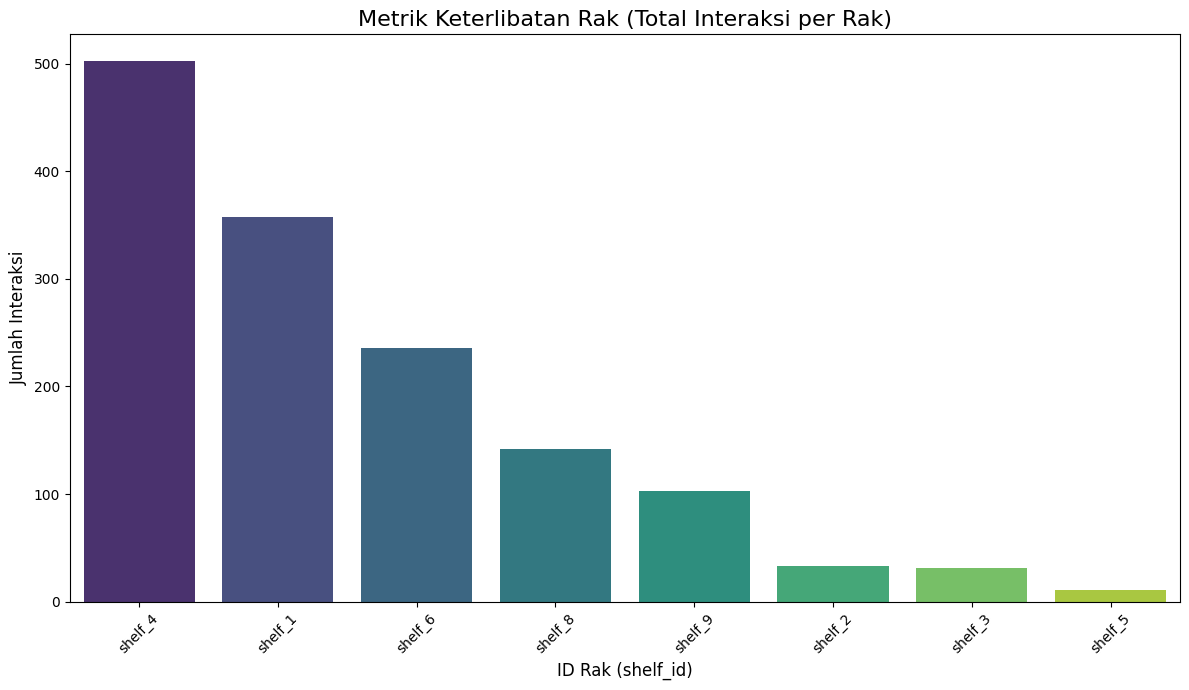

Tabel aksi per rak disimpan.
Grafik distribusi aksi per rak disimpan.


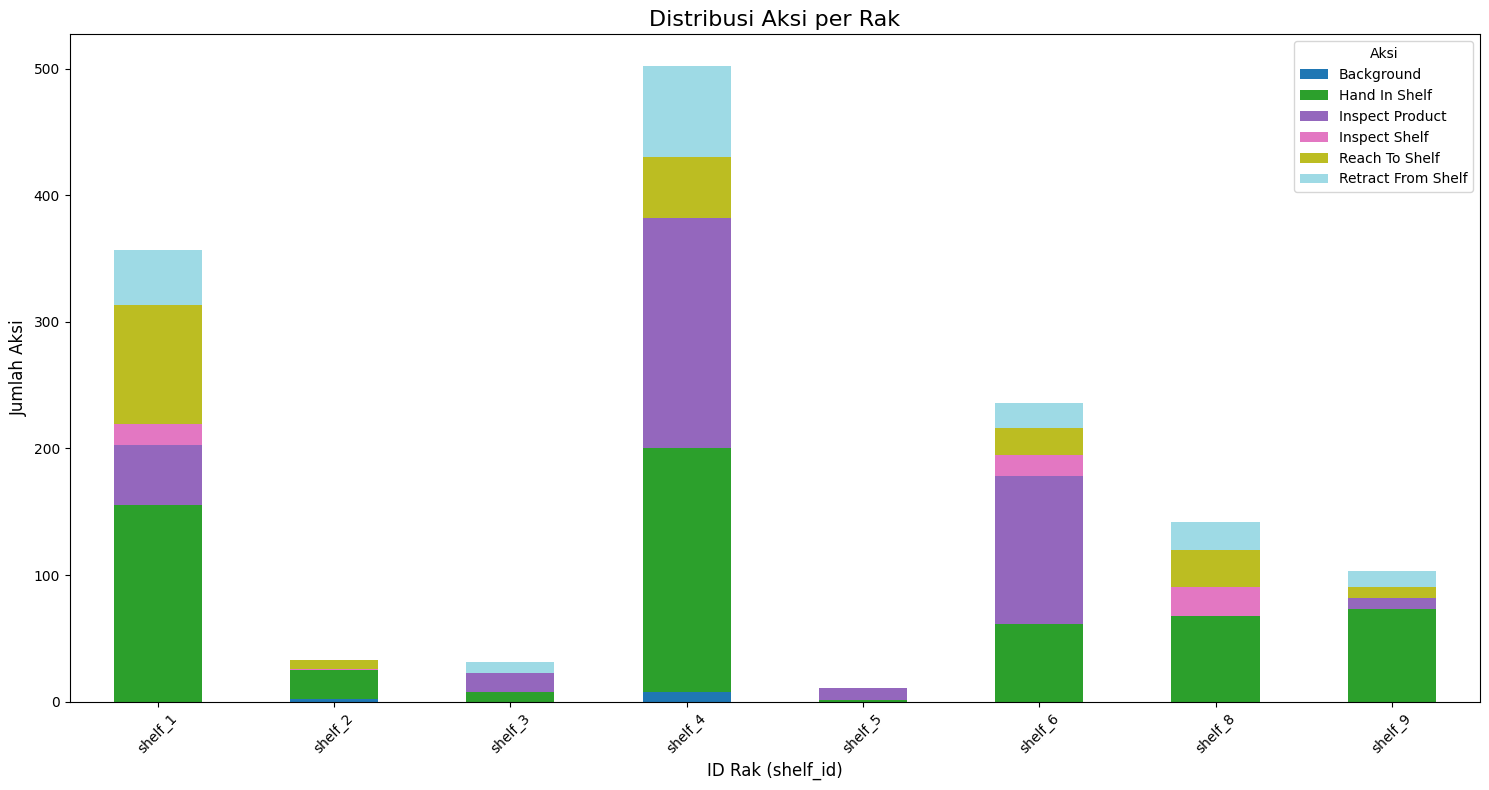


Analisis Deskriptif Selesai. Hasil disimpan di folder 'descriptive_outputs'.


In [4]:
if __name__ == '__main__':
    descriptive_analysis()